In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Github/

/content/drive/MyDrive/Github


In [4]:
pwd

'/content/drive/MyDrive/Github'

In [5]:
!git init Chatbot

Reinitialized existing Git repository in /content/drive/MyDrive/Github/Chatbot/.git/


In [6]:
%cd Chatbot/

/content/drive/MyDrive/Github/Chatbot


In [7]:
%ls -a

chatbot.ipynb  data/  .git/  .ipynb_checkpoints/


In [8]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	chatbot.ipynb
	data/

nothing added to commit but untracked files present (use "git add" to track)


In [9]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	chatbot.ipynb
	data/

nothing added to commit but untracked files present (use "git add" to track)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn

In [11]:
df = pd.read_csv("data/counsel-chat-/data/counselchat-data.csv")
df

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0
...,...,...,...,...,...,...,...,...,...
1477,56d2f2aa9471b0b41ec68e4d,Is it healthy to embarrass a child as punishment?,My grandson's step-mother sends him to school ...,https://counselchat.com/questions/is-it-health...,"Parenting,Family Conflict",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,<p>Absolutely not!&nbsp;</p><p>It is never in ...,0
1478,5797a411b43cd7825e26e246,How do I fix my relationship?,My boyfriend is in recovery from drug addictio...,https://counselchat.com/questions/how-do-i-fix...,"Relationships,Addiction","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>I'm sorry you have tension between you and ...,0
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,The birth mother attempted suicide several tim...,https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"<p>The true answer is, ""no one can really say ...",0
1480,5795952cbc069dff6a5339aa,How do I help my 20 year old boyfriend who say...,I think adult life is making him depressed and...,https://counselchat.com/questions/how-do-i-hel...,"Relationships,Depression,Substance Abuse","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>How do you help yourself to believe you req...,0


In [12]:
df.columns

Index(['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics',
       'therapistName', 'therapistUrl', 'answerText', 'upvotes'],
      dtype='object')

In [13]:
df.shape

(1482, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionID     1482 non-null   object
 1   questionTitle  1480 non-null   object
 2   questionText   1383 non-null   object
 3   questionUrl    1482 non-null   object
 4   topics         1472 non-null   object
 5   therapistName  1482 non-null   object
 6   therapistUrl   1482 non-null   object
 7   answerText     1482 non-null   object
 8   upvotes        1482 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 104.3+ KB


In [15]:
df.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0


In [16]:
df.tail()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
1477,56d2f2aa9471b0b41ec68e4d,Is it healthy to embarrass a child as punishment?,My grandson's step-mother sends him to school ...,https://counselchat.com/questions/is-it-health...,"Parenting,Family Conflict",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,<p>Absolutely not!&nbsp;</p><p>It is never in ...,0
1478,5797a411b43cd7825e26e246,How do I fix my relationship?,My boyfriend is in recovery from drug addictio...,https://counselchat.com/questions/how-do-i-fix...,"Relationships,Addiction","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>I'm sorry you have tension between you and ...,0
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,The birth mother attempted suicide several tim...,https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"<p>The true answer is, ""no one can really say ...",0
1480,5795952cbc069dff6a5339aa,How do I help my 20 year old boyfriend who say...,I think adult life is making him depressed and...,https://counselchat.com/questions/how-do-i-hel...,"Relationships,Depression,Substance Abuse","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>How do you help yourself to believe you req...,0
1481,5773e438b9ff751f196e8df0,I'm worried about my new job.,I just took a job that requires me to travel f...,https://counselchat.com/questions/i-m-worried-...,"Anxiety,Career Counseling",Philip Kolba,https://counselchat.com/therapists/philip-kolba,<p>hmm this is a tough one!</p>,0


In [17]:
df.isna().sum()

questionID        0
questionTitle     2
questionText     99
questionUrl       0
topics           10
therapistName     0
therapistUrl      0
answerText        0
upvotes           0
dtype: int64

In [18]:
#QuestionIDs are duplicated in this dataset
df[df['questionID'].duplicated()]

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
13,55717c13a03de6c365f45be9,"Sleeping, Anger and Anxiety",I have a lot of issues going on right now. Fir...,https://counselchat.com/questions/sleeping-ang...,"Anxiety,Anger Management",Keisha Helms,https://counselchat.com/therapists/keisha-helms,<p>Hi there. I have to commend you on reaching...,0
54,55869458e1d57a380899c19c,How do I approach my doctor about seeing a the...,I'm worried I should see a therapist due to pa...,https://counselchat.com/questions/how-do-i-app...,Professional Ethics,"Eric Ström, JD, MA, LMHC",https://counselchat.com/therapists/eric-str-m-...,<p>Having this kind of conversation with a doc...,0
72,55d6bd42784e4b56070d3c70,"How do I cope with ""never being good enough?""",I'm always told I'm not good enough or trying ...,https://counselchat.com/questions/how-do-i-cop...,"Family Conflict,Self-esteem",Dr. Rachelle Vaughan,https://counselchat.com/therapists/dr-rachelle...,<p>The feeling of never feeling good enough us...,0
75,556b6940c969ba5861709de4,How do I break an unhealthy relationship pattern?,I want a secure relationship with someone that...,https://counselchat.com/questions/how-do-i-bre...,Relationship Dissolution,Rebecca Wong,https://counselchat.com/therapists/rebecca-wong,<p>You may be interested in reading my most re...,0
86,55711873a03de6c365f45bbb,About a year ago I found out my husband had ch...,Cheating is something unacceptable for me but ...,https://counselchat.com/questions/about-a-year...,"Relationships,Marriage",Rebecca Wong,https://counselchat.com/therapists/rebecca-wong,<p>Let's just start with acknowledging that tr...,0
...,...,...,...,...,...,...,...,...,...
1475,57799c9772f4321a37b64221,Is it normal to cry during therapy?,I start counseling/therapy in a few days (I'm ...,https://counselchat.com/questions/is-it-normal...,"Anxiety,Counseling Fundamentals",Elissa Gross,https://counselchat.com/therapists/elissa-gross,<p>Hi there ! &nbsp;As someone who has practic...,0
1476,577189ba3c9e6b307a8ae61f,How should I handle the child I had with my ex...,My ex-wife married and used me to have a child...,https://counselchat.com/questions/how-should-i...,"Parenting,Relationship Dissolution",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,<p>The thing that confuses a child the most is...,0
1477,56d2f2aa9471b0b41ec68e4d,Is it healthy to embarrass a child as punishment?,My grandson's step-mother sends him to school ...,https://counselchat.com/questions/is-it-health...,"Parenting,Family Conflict",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,<p>Absolutely not!&nbsp;</p><p>It is never in ...,0
1478,5797a411b43cd7825e26e246,How do I fix my relationship?,My boyfriend is in recovery from drug addictio...,https://counselchat.com/questions/how-do-i-fix...,"Relationships,Addiction","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>I'm sorry you have tension between you and ...,0


In [19]:
df.drop_duplicates('questionID')

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0
...,...,...,...,...,...,...,...,...,...
1454,579a83eeb43cd7825e26e2ba,How to get over somebody?,"Our relationship ended about 7 years ago, but ...",https://counselchat.com/questions/how-to-get-o...,Relationship Dissolution,"Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>What you're most likely trying to get over ...,0
1461,579822ccb43cd7825e26e257,I don't know how to deal with my boyfriend's f...,We rent from from my boyfriend's parents. His ...,https://counselchat.com/questions/i-don-t-know...,"Family Conflict,Relationships","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>You're expecting reasonable behaviors from ...,0
1471,5797e507b43cd7825e26e24c,I feel like my mother doesn't support me.,My mother is combative with me when I say I do...,https://counselchat.com/questions/i-feel-like-...,"Family Conflict,Depression","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>Your situation sounds extremely frustrating...,0
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,The birth mother attempted suicide several tim...,https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"<p>The true answer is, ""no one can really say ...",0


In [20]:
df.shape

(1482, 9)

In [22]:
#dropping irrelevant columns from df

df_chatbot = df.drop(['questionID','upvotes','therapistUrl','questionUrl'],axis = 1)
df_chatbot.shape
df_chatbot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionTitle  1480 non-null   object
 1   questionText   1383 non-null   object
 2   topics         1472 non-null   object
 3   therapistName  1482 non-null   object
 4   answerText     1482 non-null   object
dtypes: object(5)
memory usage: 58.0+ KB


In [23]:
df_chatbot.describe()

,questionTitle,questionText,topics,therapistName,answerText
count,1480,1383,1472,1482,1482
unique,774,718,288,159,1478
top,Is it normal to go into therapy feeling nervous?,I've gone to a couple therapy sessions so far ...,Relationships,"Sherry Katz, LCSW",<p><br></p>
freq,22,22,116,275,5


In [24]:
df_chatbot.isna().sum()

questionTitle     2
questionText     99
topics           10
therapistName     0
answerText        0
dtype: int64

In [25]:
#dropping rows having NAN values for column questionTitle since we have only 2 NAN and asumming it is okay to drop only 2 rows.
#Below in the o/p we can see questionTitle has no NAN values and topics,questionText column has 8  and 97 NAN  values respectively now.
df_chatbot = df_chatbot.dropna(subset=['questionTitle'])
df_chatbot.isna().sum()

questionTitle     0
questionText     97
topics            8
therapistName     0
answerText        0
dtype: int64

In [26]:
#First let's find how many classes of topics we have in our dataset

df_topic = pd.DataFrame(df_chatbot[['topics']].value_counts()).reset_index()
df_topic.columns = ['topics','count']
df_topic.describe()
#max is 116,and min is 1,lets plot to see which topic has been more/less converesed!


,count
count,288.000000
mean,5.111111
std,10.280126
min,1.000000
25%,1.000000
50%,2.000000
75%,4.250000
max,116.000000


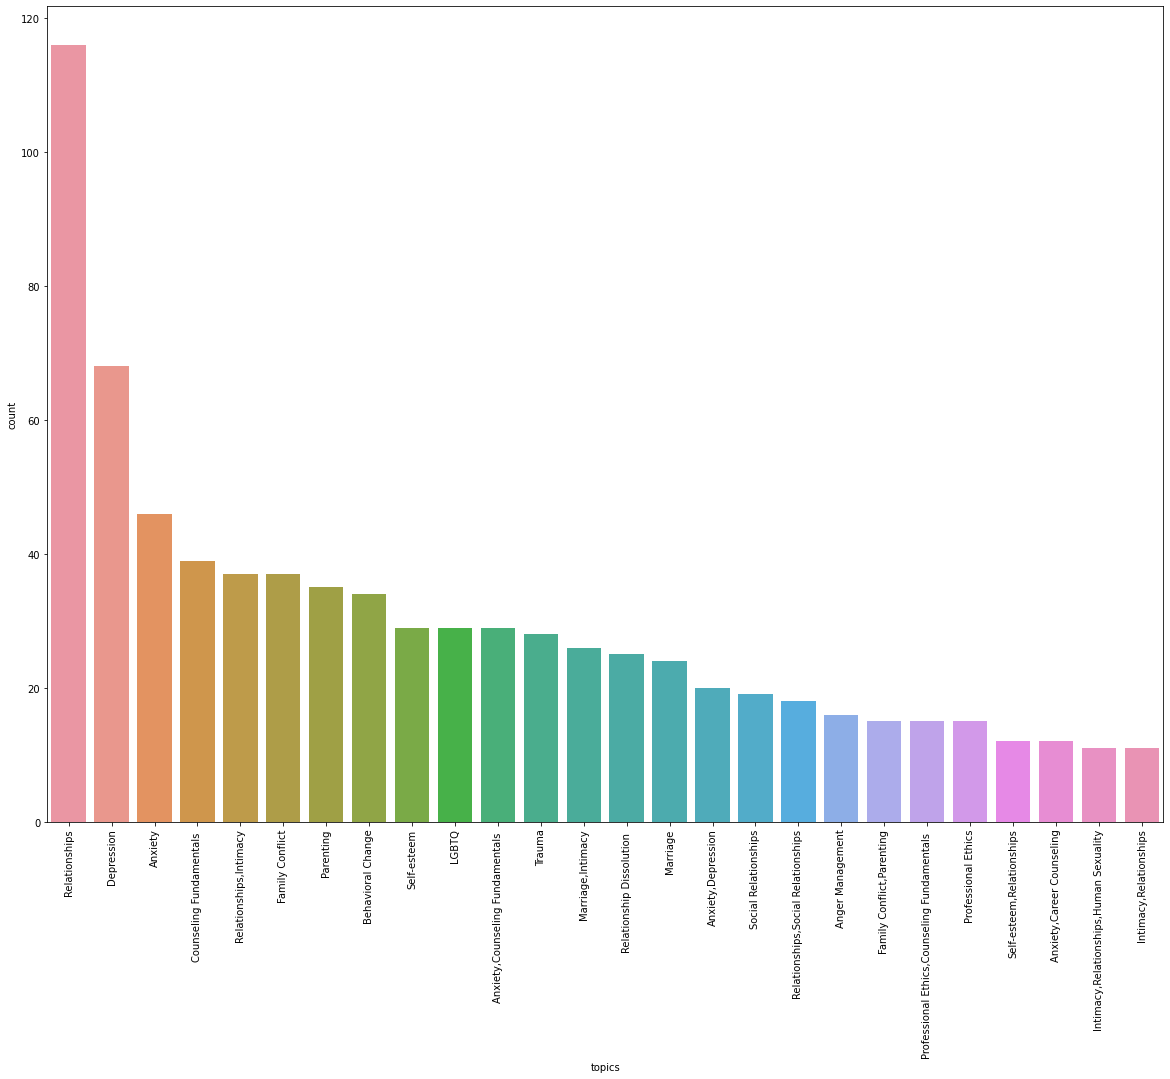

In [27]:
import seaborn as sns
df_plot = df_topic[df_topic['count']>10]
fig, ax = pt.subplots(figsize=(20,15))
pt.xticks(rotation=90, fontsize='10')
sns.barplot(x = 'topics', y = 'count',data = df_plot,ax = ax)
#From below output we can see Relationship topic has highest count
#which means relationship related conversations are highest!

In [34]:
#Below are the details who all are the therapists who guided for specific topics.
df2 = df_chatbot.groupby(["topics"])
df2.first()

,questionTitle,questionText,therapistName,answerText
topics,,,,
Addiction,How do I help my husband get over his drinking...,None,"Sherry Katz, LCSW",<p>By being truthful with him about how his dr...
"Addiction,Depression,Self-harm",Why does it feel as if self-harm is an addiction?,"I self-harm, and I stop for awhile. Then when ...","Todd Schmenk, M.S., M.Ed.","<p>In a way, self-harm can present somewhat li..."
"Addiction,Marriage,Intimacy",My husband was lying about drinking again.,My husband has had issues with alcohol addicti...,Lynda Martens,"<p>Hi Los Angeles,</p><p>So your husband is gi..."
"Addiction,Professional Ethics",The organization I work for has told me I cann...,"This is my recovery, and I don't feel that it ...","Robin Landwehr, DBH, LPCC, NCC","<div>Hello, and thank you for your question. I..."
"Addiction,Substance Abuse",How can I stop abusing alcohol?,"I have bipolar II disorder, I'm addicted to al...",Margaret Van Ackeren,<p>You may feel hopeless but YOU are not hopel...
...,...,...,...,...
"Trauma,Stress,Anxiety,Anger Management",How do I deal with all of my disorders?,I have attention-deficit/hyperactivity disorde...,Sarah McIntyre,I am so sorry to hear that you are struggling....
Workplace Relationships,What can I do if my coworkers accuse me of moo...,My coworkers are making false statements about...,Rebecca Duellman,"<p>I can’t give you legal advice, but employer..."
"Workplace Relationships,Career Counseling",I feel like I'm going to get fired because I c...,"I'm a teenager, and I just got my first job. I...",Daniel Kelley-Petersen,"<p>Getting your first job is an exciting, terr..."


In [39]:
#From elow output we can infer who all are therapists have given therapy to topic "Relationships". 
df2.get_group('Relationships')

,questionTitle,questionText,topics,therapistName,answerText
14,I need help of letting go of a man who hurt me...,NaN,Relationships,Danielle Alvarez,<p>It is incredibly hard to let go of a relati...
16,My girlfriend broke up with me but I want her ...,Me and my girlfriend just broke up. She said s...,Relationships,"Kristi King-Morgan, LMSW",<p>I am sorry to hear of these troubles. I se...
19,Dealing with an unfaithful and judgmental sign...,I have been with this guy on and off for 8 yea...,Relationships,Rebecca Duellman,"<p>I don't think you’ve lost something, I thin..."
33,How do I choose between two guys?,"I have been with a guy for 4 years, he's a gr...",Relationships,Keisha Helms,"<p>Hi there. Wow, this sounds like a sticky si..."
35,I feel like I could never be with anyone becau...,What do I do if I have been feeling like I cou...,Relationships,Danielle Alvarez,<p>I'm sorry you are feeling uncared for. I'm ...
...,...,...,...,...,...
1265,Am I overreacting by breaking up with my boyfr...,My boyfriend called me a particular profanity ...,Relationships,Laura Salinas,<p>It sounds like you are reacting to an issue...
1297,I want to become a better man.,I'm having relationship problems and I want to...,Relationships,"Sherry Katz, LCSW",<p>I'm glad to read about your willingness to ...
1346,"I'm in a relationship, and I think I like my e...","I'm dating this guy, Peter. My friend Jennifer...",Relationships,"Shawn Thomas Berthel, M.S., LMHC",<p>Hello. The dynamics of having a romantic re...
1435,How can I be less dependent on my boyfriend?,My boyfriend and I have been dating for almost...,Relationships,"Sherry Katz, LCSW",<p>From what you write you've got good motivat...


In [73]:
df_therapist = pd.DataFrame(df_chatbot[['therapistName']].value_counts().reset_index())
df_therapist.columns = ['thearpistName','count']
df_therapist

,thearpistName,count
0,"Sherry Katz, LCSW",275
1,"Lauren Ostrowski, MA, LPC, NCC, DCC, CCTP",144
2,Lynda Martens,127
3,"Robin Landwehr, DBH, LPCC, NCC",45
4,Sonya Wilson,44
...,...,...
153,Lisette Lahana,1
154,Robin Richardson,1
155,Sally high,1
156,David Cranford,1


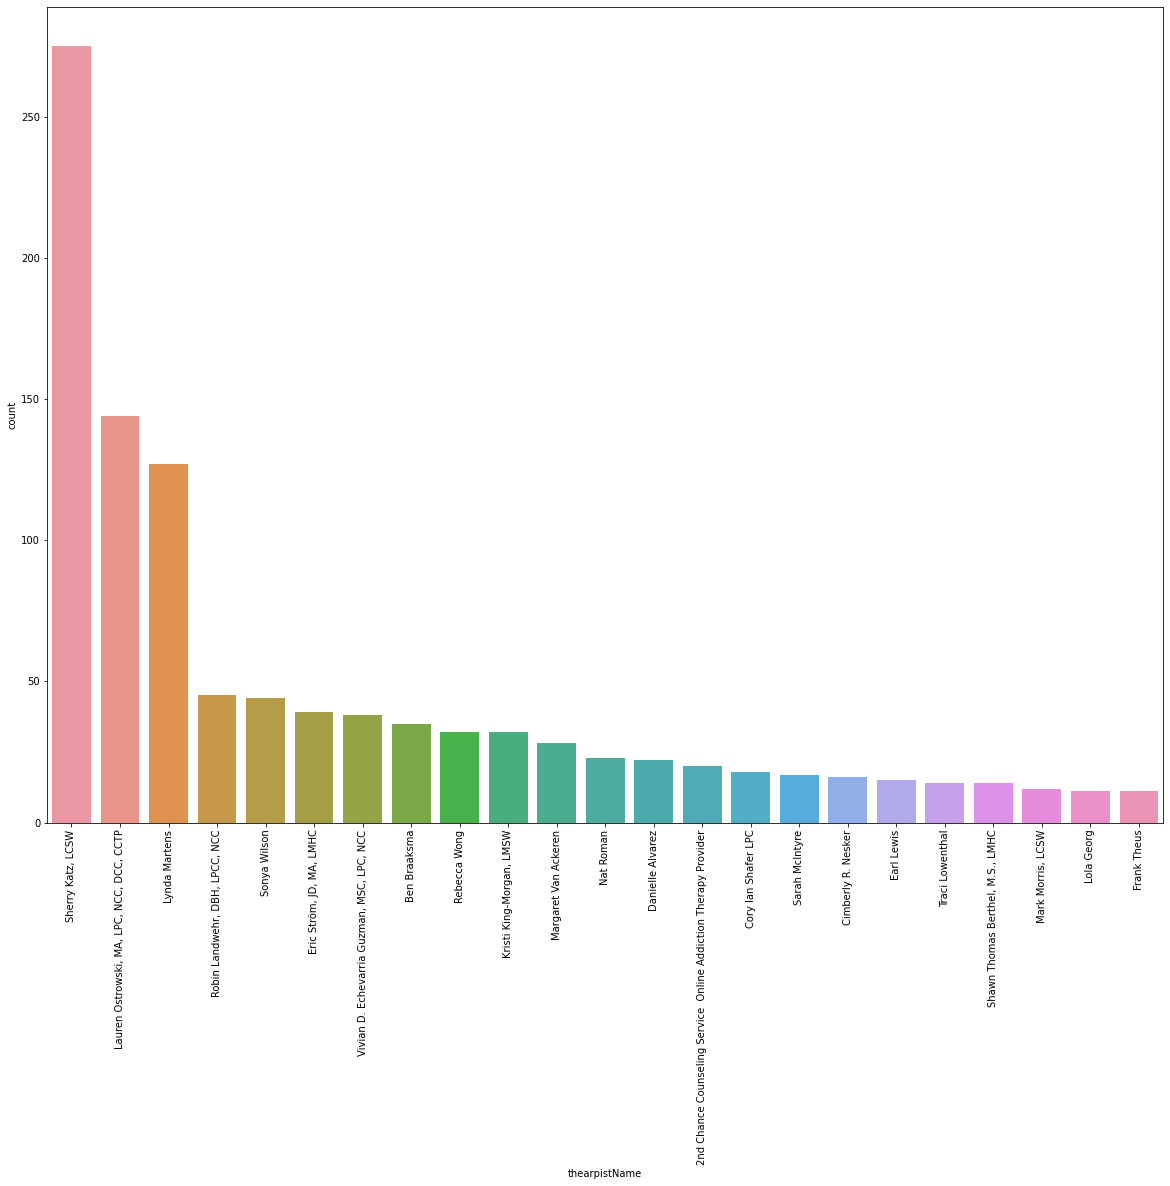

In [80]:
import seaborn as sns
df_plot_therapist = df_therapist[df_therapist['count']>10]
fig, ax = pt.subplots(figsize=(20,15))
pt.xticks(rotation=90, fontsize='10')
sns.barplot(x = 'thearpistName', y = 'count',data = df_plot_therapist,ax = ax)
#SherryKatz,LCSW have given maximum therapies from below graph